In [71]:
import pandas as pd

In [72]:
df_chatbot = pd.read_csv('Dataset_Coded_EN.csv', sep=';')
df_chatbot.head(10)

,Timestamp,Q1,Q2,Q3,Q4,Q5.1,Q5.2,Q5.3,Q5.4,Q5.5,...,Q8.2,Q8.3,Q8.4,Q8.5,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,5.14.2023 21:22:19,2,International Economic Relations,1,4,4,4,5,5,4,...,5,5,4,5,4,5,5,4,4,NaN
1,5.15.2023 8:45:52,1,International Economic Relations,1,3,2,4,2,1,3,...,4,4,2,3,3,4,3,2,2,NaN
2,5.15.2023 9:54:15,1,International Economic Relations,1,2,3,3,3,2,3,...,4,4,3,3,3,3,2,2,3,NaN
3,5.15.2023 15:17:41,1,International Economic Relations,1,2,4,4,4,2,4,...,4,4,4,4,4,4,3,4,4,NaN
4,5.15.2023 15:19:02,1,International Economic Relations,1,3,4,4,3,2,4,...,4,4,3,3,3,3,3,3,3,NaN
5,5.15.2023 15:23:54,1,International Economic Relations,2,2,5,4,4,2,4,...,4,3,2,1,3,4,3,1,2,AI should not be overused by either students o...
6,5.15.2023 15:24:12,1,International Economic Relations,2,3,3,4,4,3,3,...,4,4,3,3,4,3,3,4,3,I like them.
7,5.15.2023 19:17:51,2,Economics,2,2,2,4,4,3,2,...,4,4,4,3,4,3,3,4,3,A specialized course could be created to prepa...
8,5.15.2023 19:26:12,1,Economics,2,3,3,4,4,3,3,...,4,4,3,3,4,3,3,3,2,Educators should familiarize more students wit...
9,5.16.2023 9:04:40,1,Marketing,1,4,4,2,3,1,3,...,4,4,2,3,3,4,3,3,3,NaN


In [73]:
df_chatbot.info() 

df_chatbot = df_chatbot.rename(columns={'Timestamp':'Data/Hora',
                        'Q1':'Nível Acadêmico',
                        'Q2':'Curso',
                        'Q3':'Sexo',
                        'Q4':'Já usou tecnologias de IA generativa como o ChatGPT?',
                        'Q5.1':'Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas',
                        'Q5.2':'Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas',
                        'Q5.3':'Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas',
                        'Q5.4':'Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas',
                        'Q5.5':'Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos',
                        'Q5.6':'Entendo que tecnologias de IA generativa como o ChatGPT têm inteligência emocional e empatia limitadas, o que pode levar a saídas que são insensíveis ou inadequadas',
                        'Q6.1': 'Eu imagino integrar tecnologias de IA generativa como o ChatGPT nas minhas práticas de ensino e aprendizagem no futuro.',
                        'Q6.2': 'Os alunos devem aprender a usar bem as tecnologias de IA generativa para suas carreiras',
                        'Q6.3': 'Acredito que tecnologias de IA generativa, como o ChatGPT, podem melhorar minha competência digital',
                        'Q6.4': 'Acredito que tecnologias de IA generativa, como o ChatGPT, podem me ajudar a economizar tempo',
                        'Q6.5': 'Acredito que tecnologias de IA, como o ChatGPT, podem me fornecer insights e perspectivas únicas que eu talvez não tenha pensado por mim mesmo',
                        'Q6.6': 'Acho que tecnologias de IA, como o ChatGPT, podem me fornecer feedback e sugestões personalizadas e imediatas para minhas tarefas',
                        'Q6.7': 'Acho que tecnologias de IA, como o ChatGPT, são uma ótima ferramenta, pois está disponível 24/7',
                        'Q6.8': 'Acho que tecnologias de IA, como o ChatGPT, são uma ótima ferramenta para serviços de apoio aos estudantes devido ao anonimato',
                        'Q7.1': 'Usar tecnologias de IA generativa, como o ChatGPT, para completar tarefas mina o valor da educação universitária',
                        'Q7.2': 'Tecnologias de IA generativa, como o ChatGPT, limitarão minhas oportunidades de interagir com outras pessoas e socializar enquanto faço o trabalho',
                        'Q7.3': 'Tecnologias de IA generativa, como o ChatGPT, prejudicarão meu desenvolvimento de habilidades genéricas ou transferíveis, como trabalho em equipe, resolução de problemas e habilidades de liderança',
                        'Q7.4': 'Posso me tornar excessivamente dependente de tecnologias de IA generativa',
                        'Q8.1': 'Apoio personalizado e imediato ao aprendizado',
                        'Q8.2': 'Apoio na escrita e brainstorming',
                        'Q8.3': 'Apoio em pesquisa e análise',
                        'Q8.4': 'Apoio multimídia visual e áudio',
                        'Q8.5': 'Apoio administrativo',
                        'Q9.1': 'Precisão e transparência',
                        'Q9.2': 'Questões de privacidade e éticas',
                        'Q9.3': 'Competências holísticas',
                        'Q9.4': 'Perspectivas de carreira',
                        'Q9.5': 'Valores humanos',
                        'Q10': 'O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?'
                        })

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  131 non-null    object
 1   Q1         131 non-null    int64 
 2   Q2         131 non-null    object
 3   Q3         131 non-null    int64 
 4   Q4         131 non-null    int64 
 5   Q5.1       131 non-null    int64 
 6   Q5.2       131 non-null    int64 
 7   Q5.3       131 non-null    int64 
 8   Q5.4       131 non-null    int64 
 9   Q5.5       131 non-null    int64 
 10  Q5.6       131 non-null    int64 
 11  Q6.1       131 non-null    int64 
 12  Q6.2       131 non-null    int64 
 13  Q6.3       131 non-null    int64 
 14  Q6.4       131 non-null    int64 
 15  Q6.5       131 non-null    int64 
 16  Q6.6       131 non-null    int64 
 17  Q6.7       131 non-null    int64 
 18  Q6.8       131 non-null    int64 
 19  Q7.1       131 non-null    int64 
 20  Q7.2       131 non-null    int64

In [74]:
# Aplicar factorize para transformar as strings em números únicos
df_chatbot['Curso'], _ = pd.factorize(df_chatbot['Curso'])

df_chatbot.head(10)

,Data/Hora,Nível Acadêmico,Curso,Sexo,Já usou tecnologias de IA generativa como o ChatGPT?,Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas,Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas,"Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos",...,Apoio na escrita e brainstorming,Apoio em pesquisa e análise,Apoio multimídia visual e áudio,Apoio administrativo,Precisão e transparência,Questões de privacidade e éticas,Competências holísticas,Perspectivas de carreira,Valores humanos,O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?
0,5.14.2023 21:22:19,2,0,1,4,4,4,5,5,4,...,5,5,4,5,4,5,5,4,4,NaN
1,5.15.2023 8:45:52,1,1,1,3,2,4,2,1,3,...,4,4,2,3,3,4,3,2,2,NaN
2,5.15.2023 9:54:15,1,0,1,2,3,3,3,2,3,...,4,4,3,3,3,3,2,2,3,NaN
3,5.15.2023 15:17:41,1,0,1,2,4,4,4,2,4,...,4,4,4,4,4,4,3,4,4,NaN
4,5.15.2023 15:19:02,1,0,1,3,4,4,3,2,4,...,4,4,3,3,3,3,3,3,3,NaN
5,5.15.2023 15:23:54,1,0,2,2,5,4,4,2,4,...,4,3,2,1,3,4,3,1,2,AI should not be overused by either students o...
6,5.15.2023 15:24:12,1,0,2,3,3,4,4,3,3,...,4,4,3,3,4,3,3,4,3,I like them.
7,5.15.2023 19:17:51,2,2,2,2,2,4,4,3,2,...,4,4,4,3,4,3,3,4,3,A specialized course could be created to prepa...
8,5.15.2023 19:26:12,1,2,2,3,3,4,4,3,3,...,4,4,3,3,4,3,3,3,2,Educators should familiarize more students wit...
9,5.16.2023 9:04:40,1,3,1,4,4,2,3,1,3,...,4,4,2,3,3,4,3,3,3,NaN


In [75]:
df_chatbot.isna().sum()

Data/Hora                                                                                                                                                                                                      0
Nível Acadêmico                                                                                                                                                                                                0
Curso                                                                                                                                                                                                          0
Sexo                                                                                                                                                                                                           0
Já usou tecnologias de IA generativa como o ChatGPT?                                                                                                                

In [76]:
# Remover a coluna 'Q2'
df_chatbot = df_chatbot.drop(columns=['O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?'])
df_chatbot.head(10)


,Data/Hora,Nível Acadêmico,Curso,Sexo,Já usou tecnologias de IA generativa como o ChatGPT?,Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas,Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas,"Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos",...,Apoio personalizado e imediato ao aprendizado,Apoio na escrita e brainstorming,Apoio em pesquisa e análise,Apoio multimídia visual e áudio,Apoio administrativo,Precisão e transparência,Questões de privacidade e éticas,Competências holísticas,Perspectivas de carreira,Valores humanos
0,5.14.2023 21:22:19,2,0,1,4,4,4,5,5,4,...,4,5,5,4,5,4,5,5,4,4
1,5.15.2023 8:45:52,1,1,1,3,2,4,2,1,3,...,4,4,4,2,3,3,4,3,2,2
2,5.15.2023 9:54:15,1,0,1,2,3,3,3,2,3,...,4,4,4,3,3,3,3,2,2,3
3,5.15.2023 15:17:41,1,0,1,2,4,4,4,2,4,...,4,4,4,4,4,4,4,3,4,4
4,5.15.2023 15:19:02,1,0,1,3,4,4,3,2,4,...,3,4,4,3,3,3,3,3,3,3
5,5.15.2023 15:23:54,1,0,2,2,5,4,4,2,4,...,5,4,3,2,1,3,4,3,1,2
6,5.15.2023 15:24:12,1,0,2,3,3,4,4,3,3,...,4,4,4,3,3,4,3,3,4,3
7,5.15.2023 19:17:51,2,2,2,2,2,4,4,3,2,...,3,4,4,4,3,4,3,3,4,3
8,5.15.2023 19:26:12,1,2,2,3,3,4,4,3,3,...,3,4,4,3,3,4,3,3,3,2
9,5.16.2023 9:04:40,1,3,1,4,4,2,3,1,3,...,4,4,4,2,3,3,4,3,3,3


In [77]:
import sweetviz as sv
sv_churn_report = sv.analyze(df_chatbot, target_feat='Curso')

                                             |          | [  0%]   00:00 -> (? left)


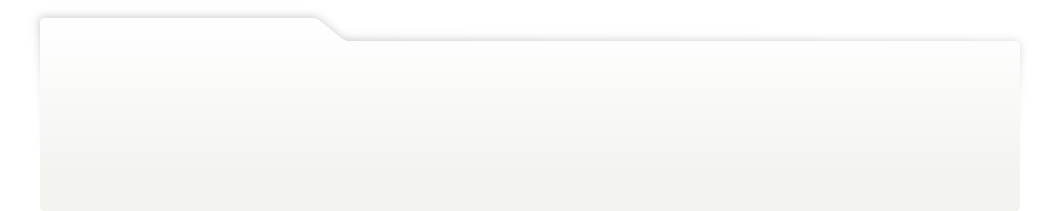
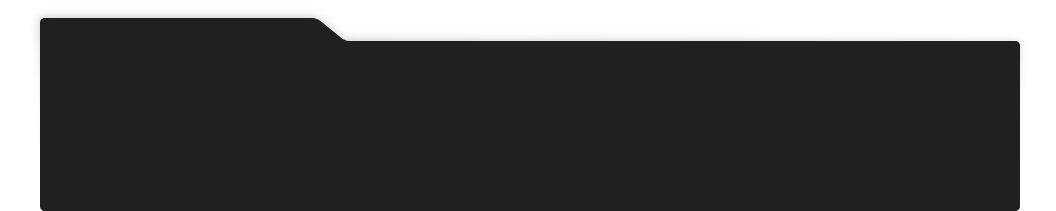
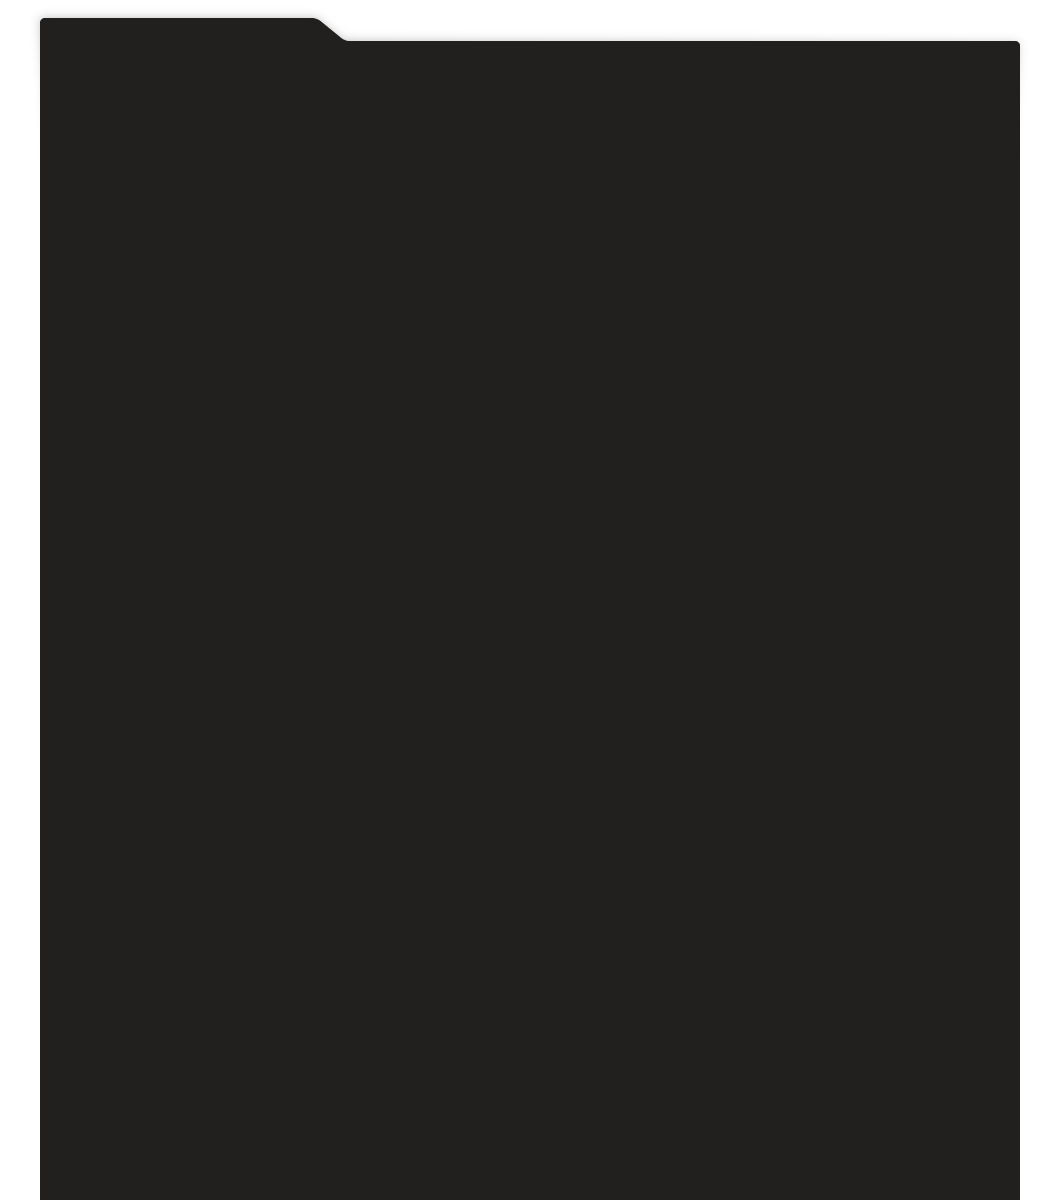
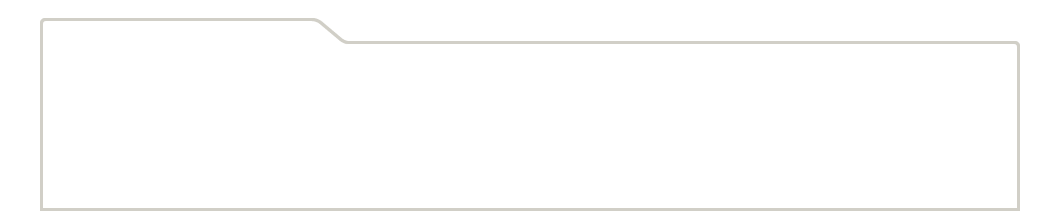
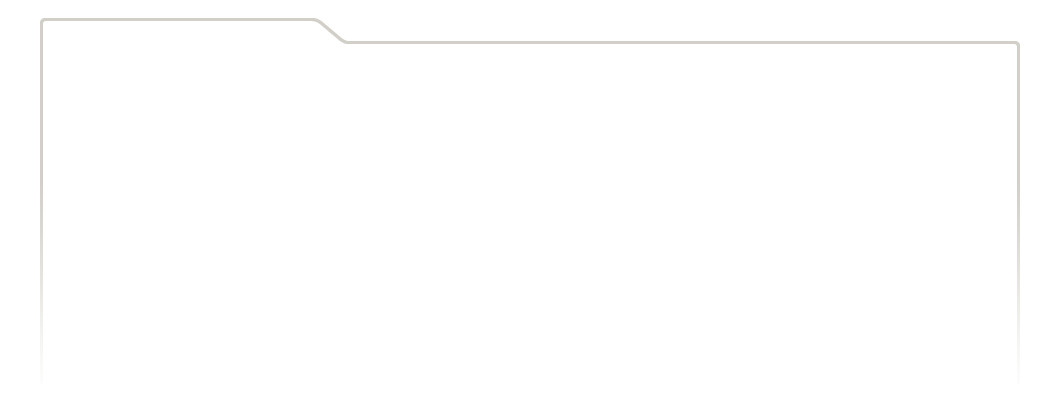
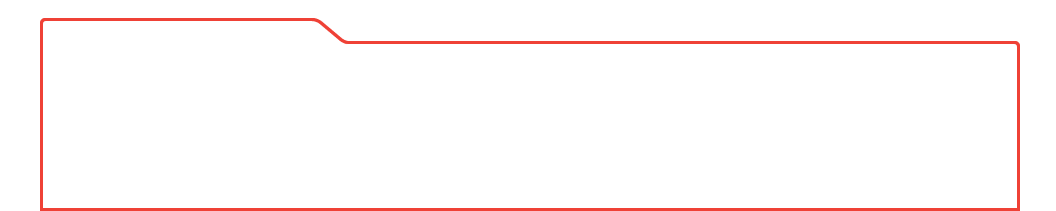
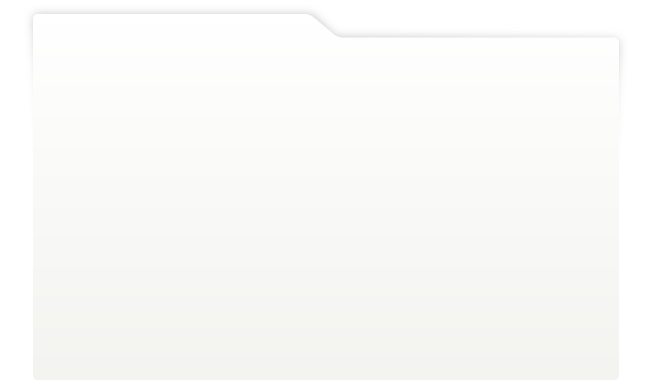
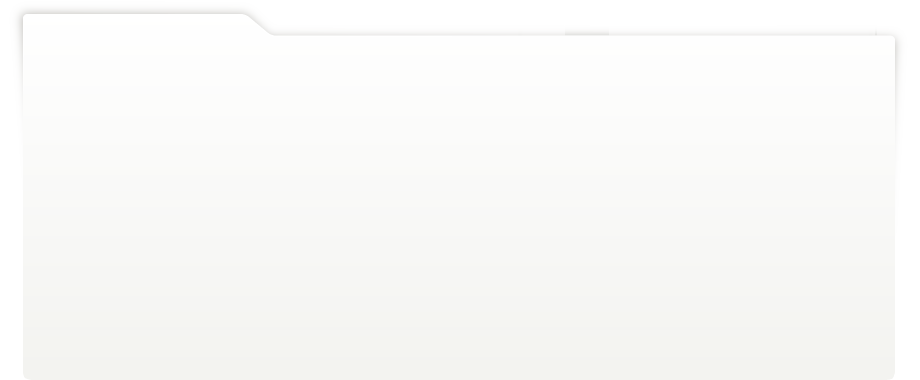
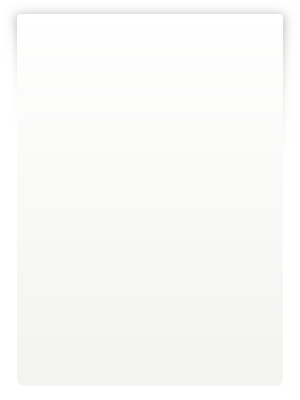
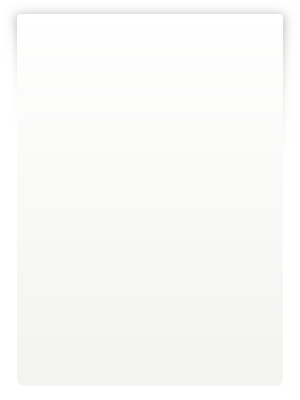
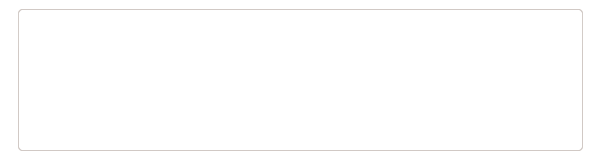
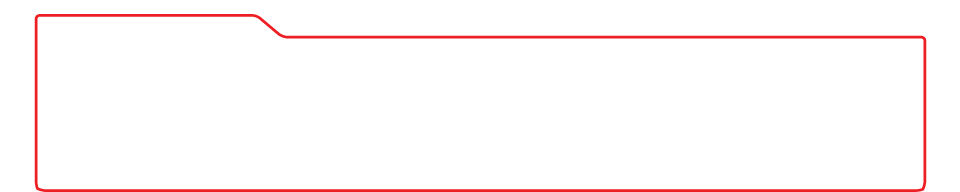
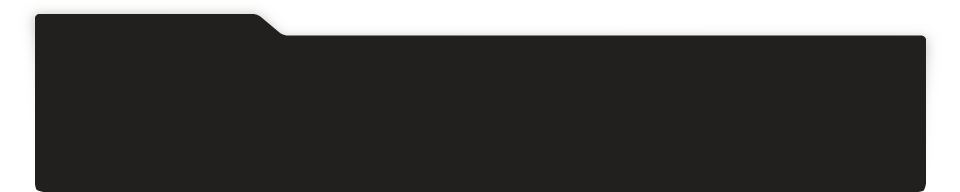
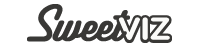
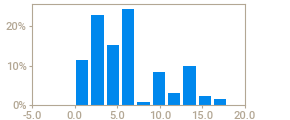
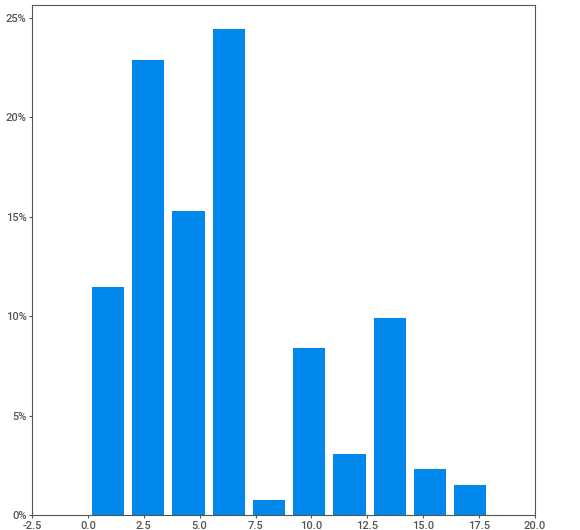
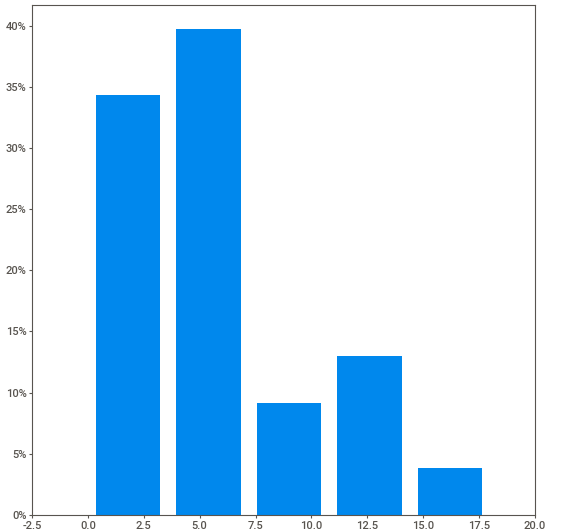
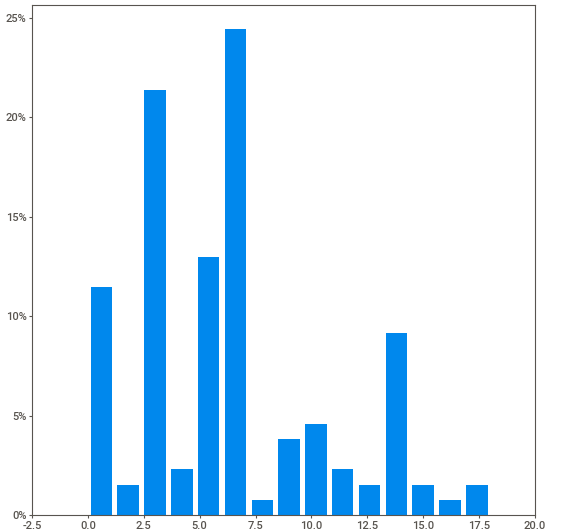
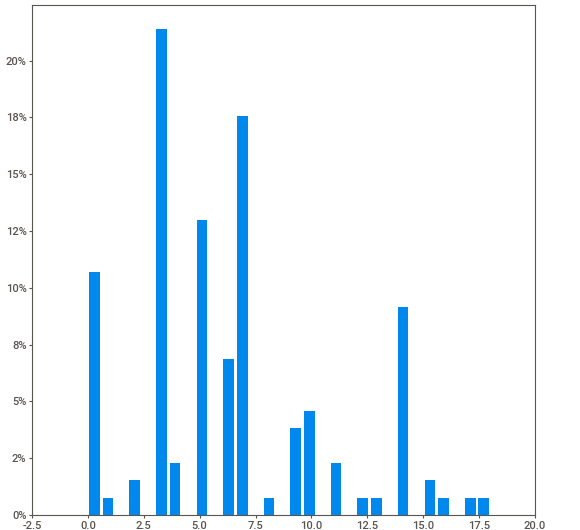
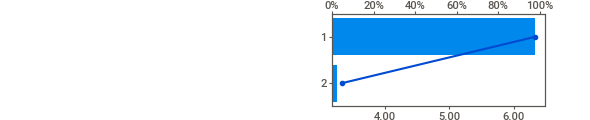
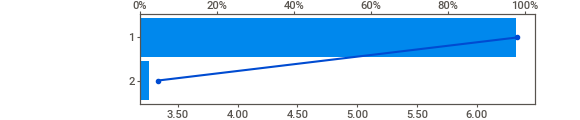
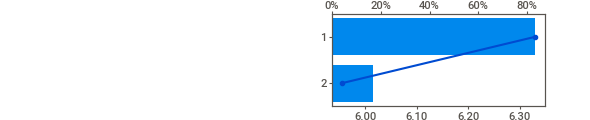
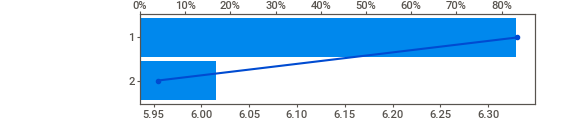
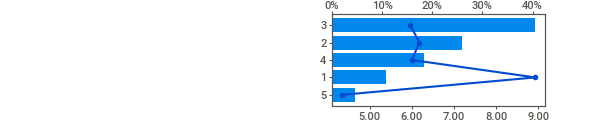
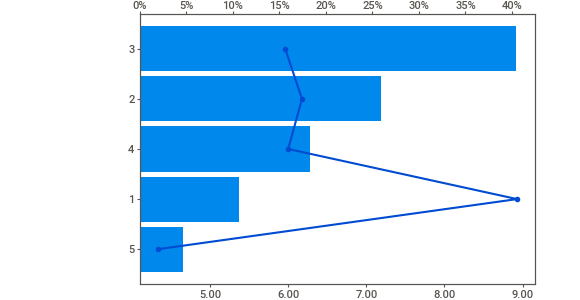
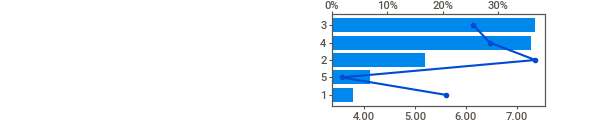
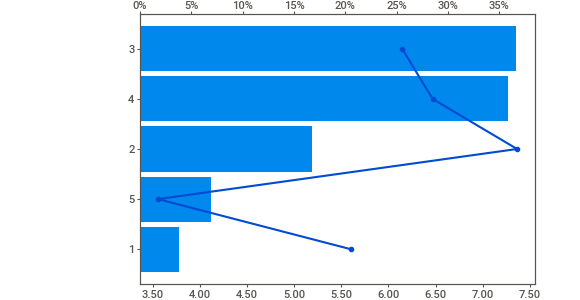
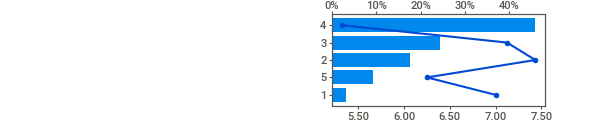
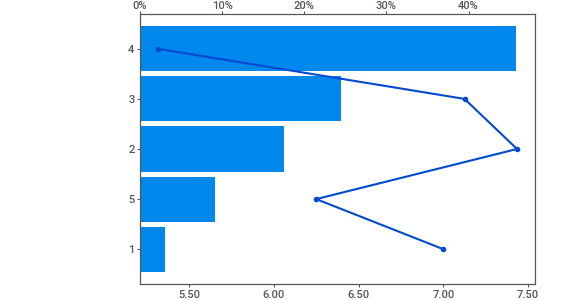
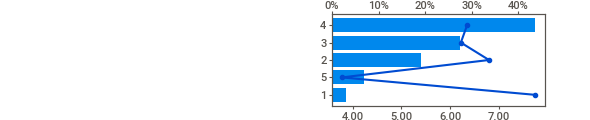
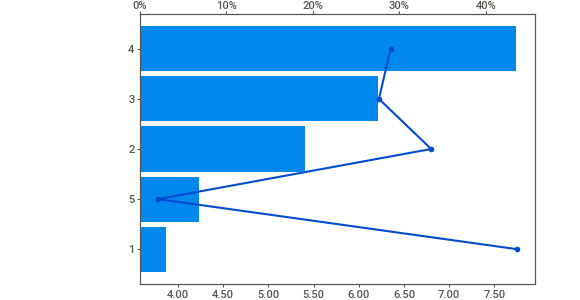
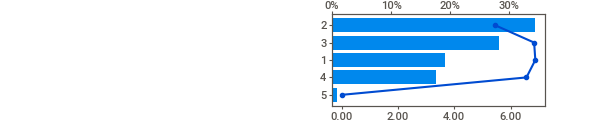
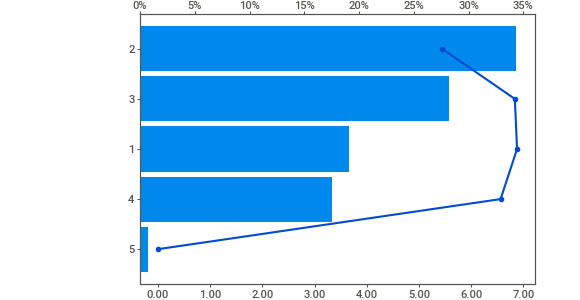
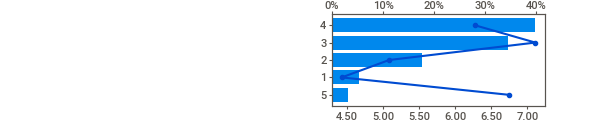
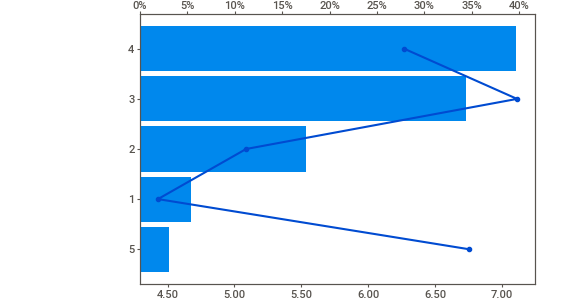
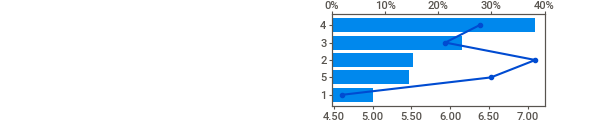
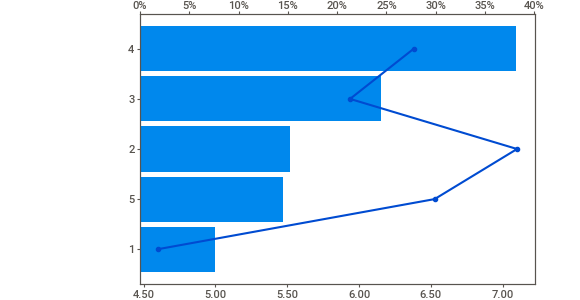
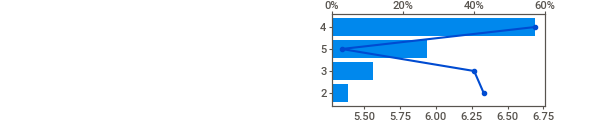
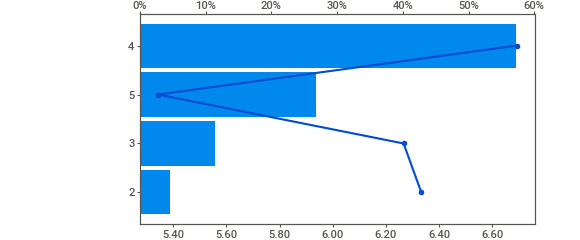
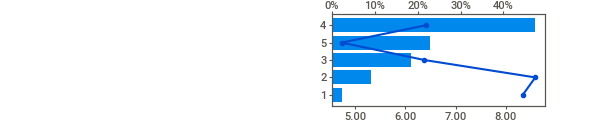
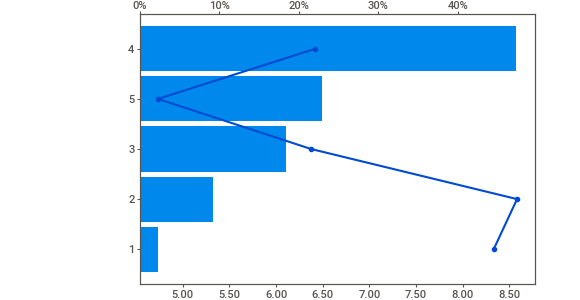
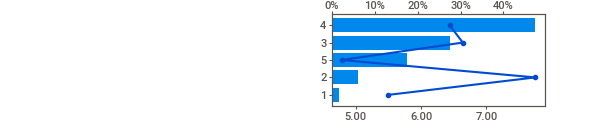
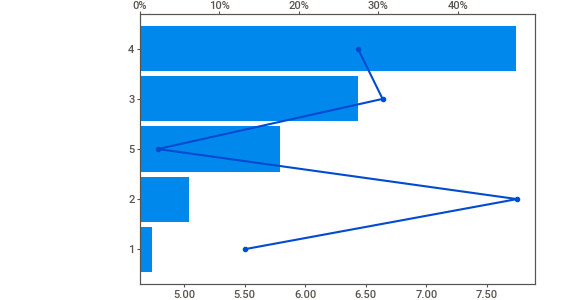
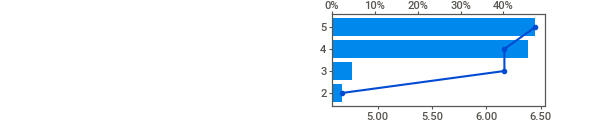
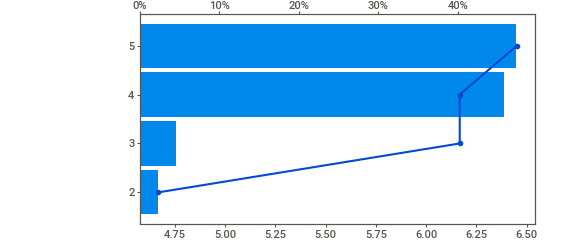
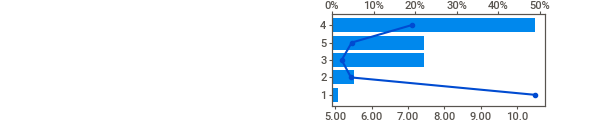
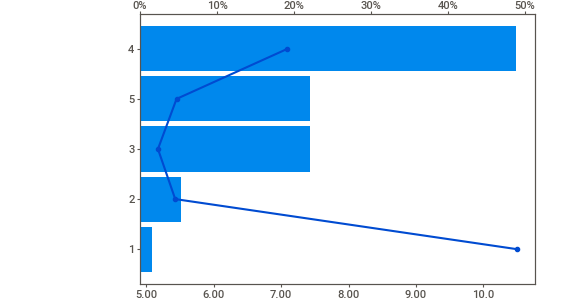
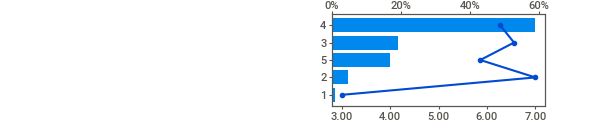
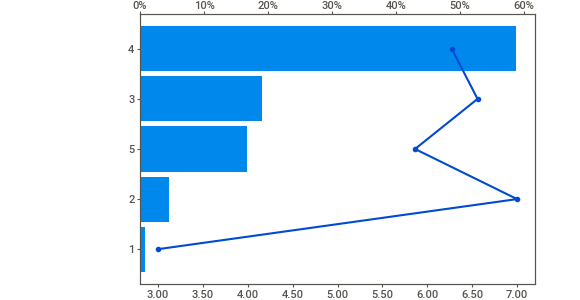
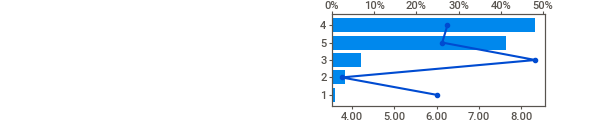
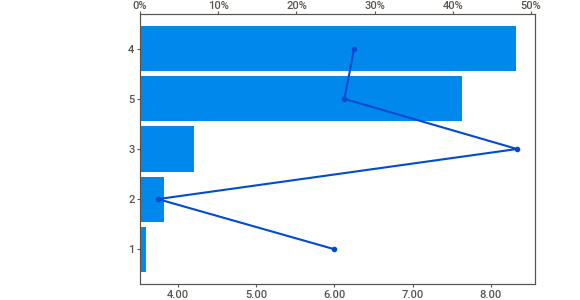
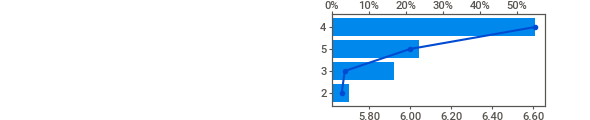
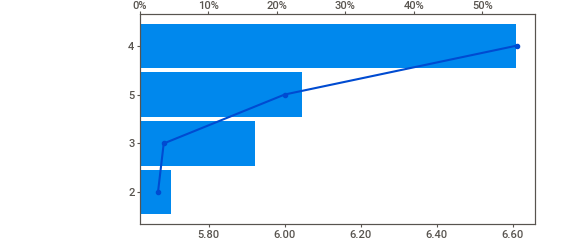
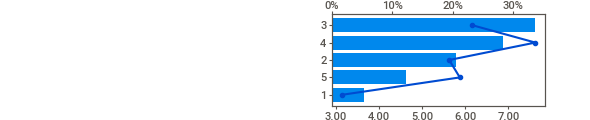
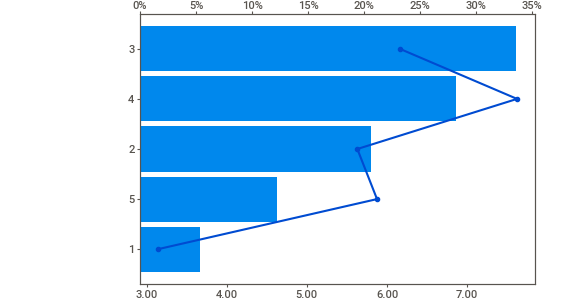
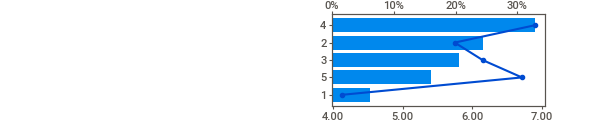
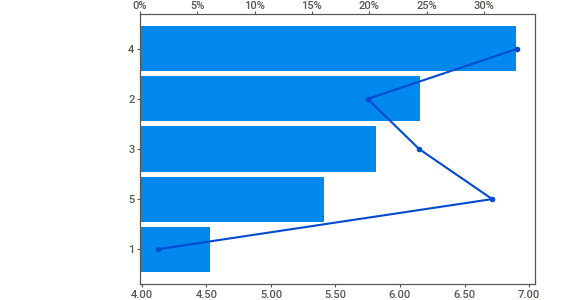
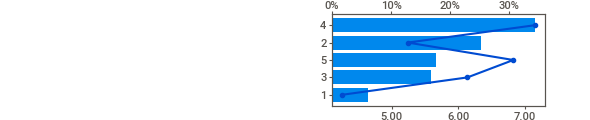
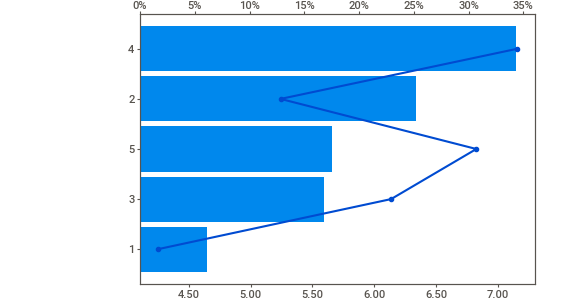
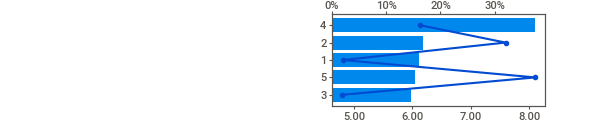
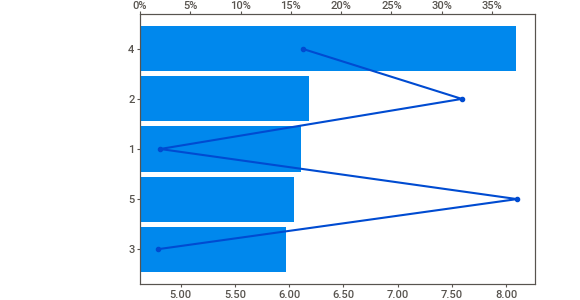
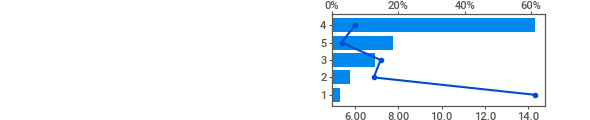
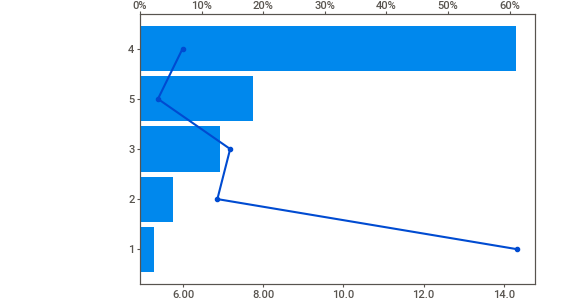
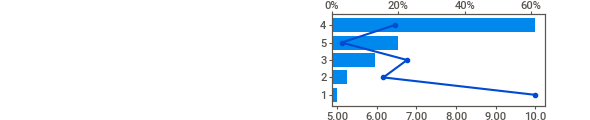
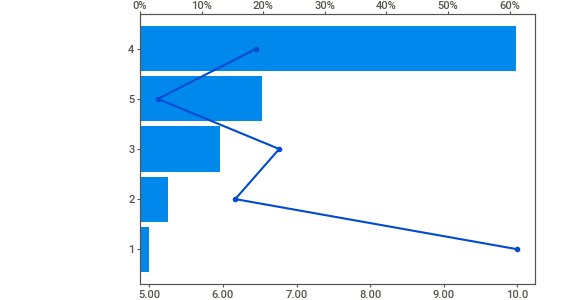
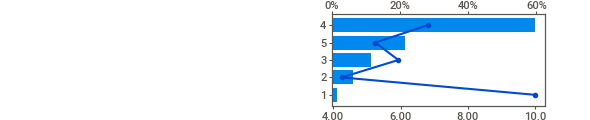
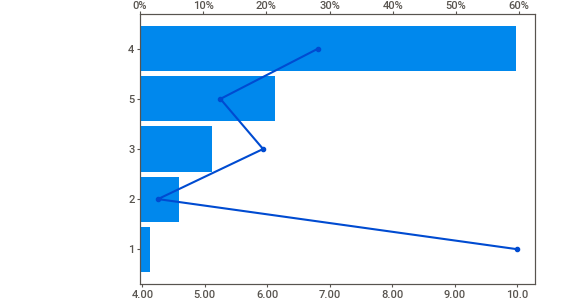
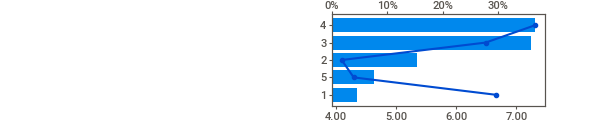
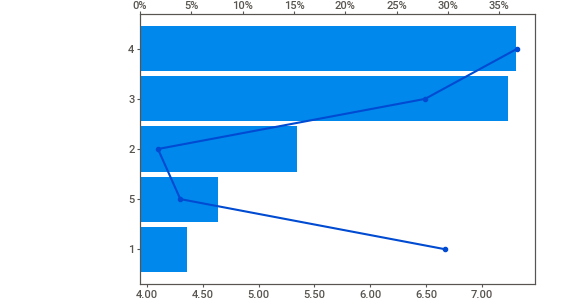
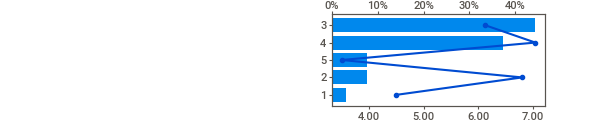
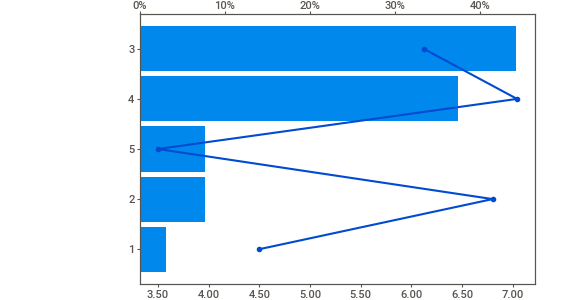
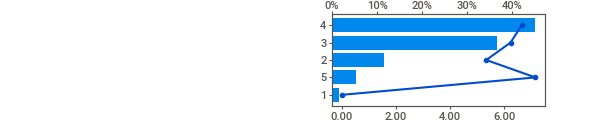
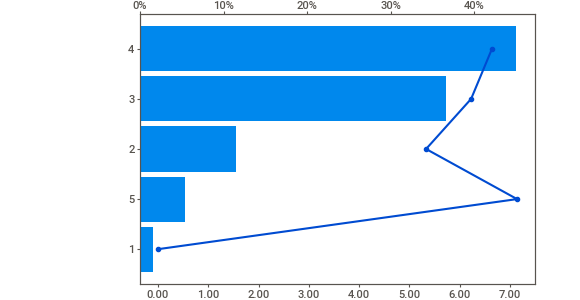
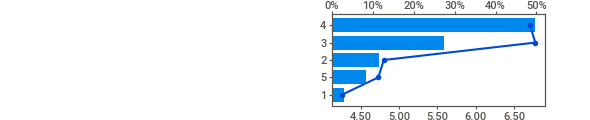
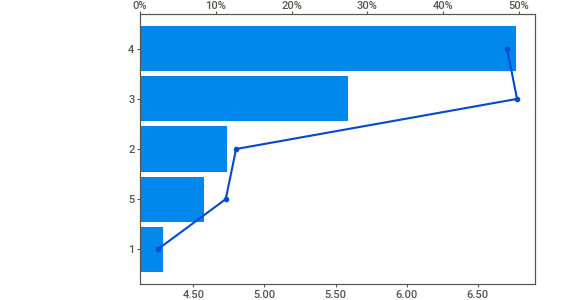
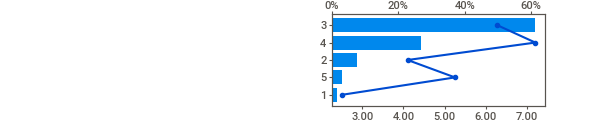
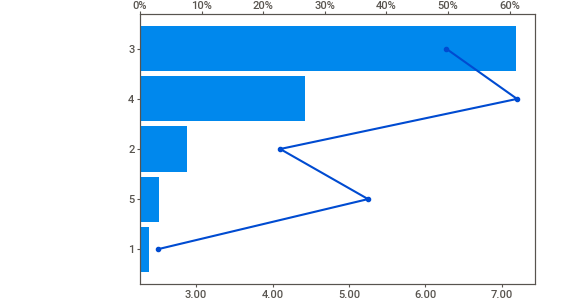
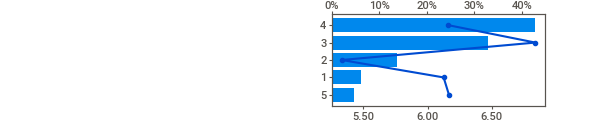
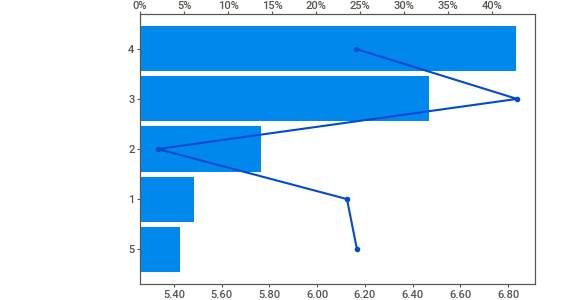
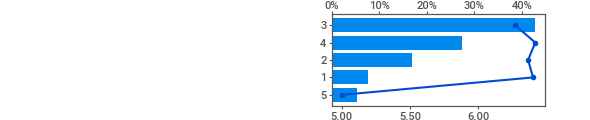
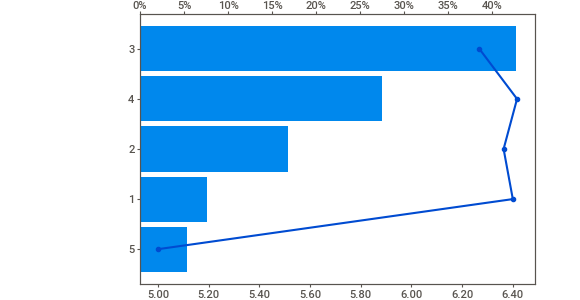
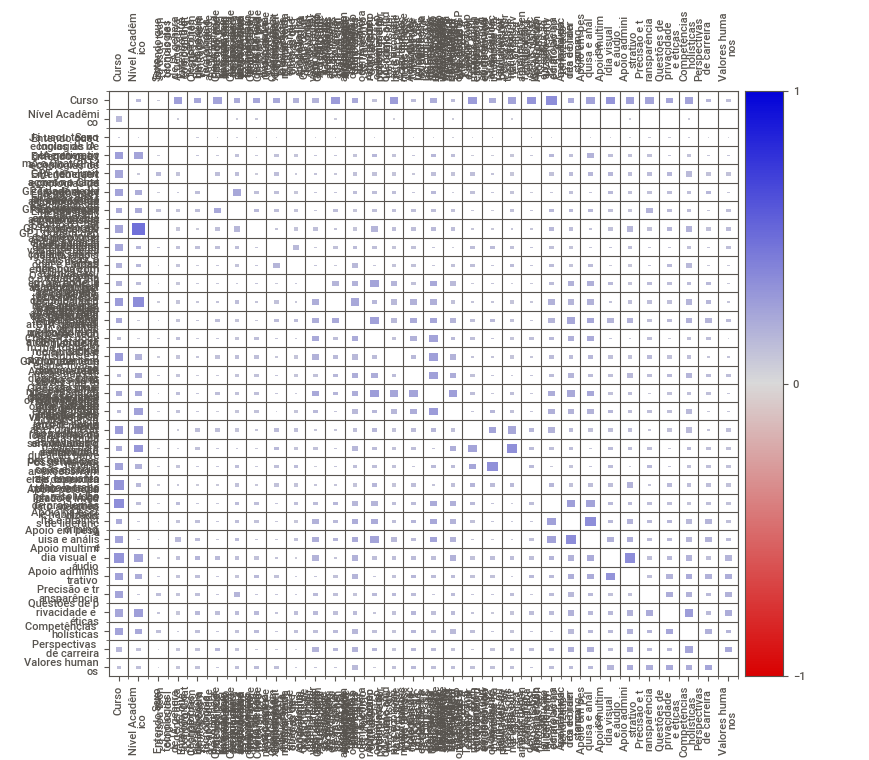
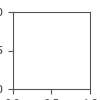

In [78]:
sv_churn_report.show_notebook()

In [79]:
sv_churn_report.show_html(filepath='./Q2.html',open_browser=True, layout='widescreen')

Report ./Q2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
